# Prática 01 - INF 394 - Processamento Digital de Imagens - 23/08/2021

## Introdução

Preencha/complete este Notebook de forma a cumprir as tarefas pedidas. Você pode:

<ul>
    <li>Executar e testar localmente, em seu computador, se já tiver se preparado e instalado a estrutura básica para execução de Notebooks Python (Jupyter)</li>
    <li>Executar na nuvem, utilizando o <a href="https://colab.research.google.com/notebooks/intro.ipynb#recent=true" target="_blank">Google Colab</a></li>
</ul>

Formato de entrega: <b>Python Notebook</b><sup>[1]</sup>

Meio de entrega: Atividade no Moodle

<b>Observações importantes:</b>

<ul>
    <li>Está vetado, para este trabalho, o uso de qualquer biblioteca, módulo pronto, framework ou coisa que o equivalha, que já traga pronta a implementação dos algoritmos e técnicas de Processamento Digital de Imagens pedidos nesta atividade (por exemplo, OpenCV). <b>Você</b> deve implementar estes recursos.</li>
    <li>Está liberado o uso de qualquer biblioteca, módulo, framework etc. que não seja para a finalidade descrita acima. Por exemplo, esteja à vontade para utilizar bibliotecas para manipulação de arranjos, matemática, gerenciamento de arquivos no SO, geração de números aleatórios etc.</li>
    <li>Pode-se utilizar como fonte de estudo o material disponibilizado no Moodle ou qualquer outro que desejar.</li>
</ul>

___________________________

<sup>[1]</sup>Se houver feito na nuvem, baixe-o para seu computador antes de entregar

## Parte 1: O básico

### Passos iniciais

#### 1.1. Importação de módulos ("bibliotecas")

Você pode ficar à vontade para adicionar outras bibliotecas que desejar, desde que observadas as considerações acima. Execute a célula abaixo.

In [1]:
from PIL import Image
import numpy as np

#### 1.2. Testando abrir e visualizar imagem

Na célula abaixo, abra e exiba em tela o arquivo <code>praiaOrig.png</code>, que você baixou no pacote <code>.zip</code> que acompanha este roteiro.

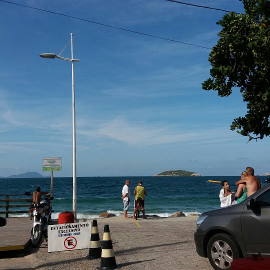

In [2]:
image = Image.open("praiaOrig.png")
#image.show()
image

#### 1.3. Declarando funções

Execute a célula abaixo. Acrescente quaisquer funções que desejar implementar durante a prática.

A função <code>rmse</code>, que já se encontra pronta, é uma possível dentre diversas métricas que podem ser utilizadas para comparar imagens, chamada <i>RMSE</i>. Ela recebe como entrada dois objetos <code>PIL Image</code> e retorna como saída um número de ponto flutuante, representando um grau de similaridade entre as duas imagens de entrada. Quanto menor o valor obtido, mais parecidas as imagens são. Para mais detalhes, assista a aula pré-gravada com o tema <i>Entropia, Ruídos e Métricas</i>.

In [2]:
def rmse(imgF, imgG):
    f = np.asarray(imgF, dtype=int)
    g = np.asarray(imgG, dtype=int)
    
    return np.sqrt(np.average((f-g)**2))

#### 1.4. Testando a primeira manipulação de imagem, na abordagem ponto a ponto

Na célula abaixo, implemente os seguintes passos:

<ol>
    <li>Extraia, para um <i>array</i> <code>numpy</code>, o conteúdo da matriz da imagem que você abriu anteriormente (praia)</li>
    <li>Obtenha/calcule o negativo da imagem</li>
    <li>Exiba em tela a imagem</li>
    <li>Salve em disco a saída, com o nome <code>praia-negativo.png</code></li>
</ol>

Resultado esperado:

<img src='praia-negativo.png' width='20%'>

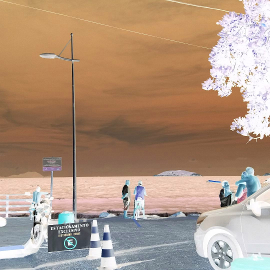

In [4]:
def negv(img):
    img_negv = np.asarray(img)
    
    white = np.array([255,255,255])
    
    for i, line in enumerate(img_negv):
        for j, pixel in enumerate(line):
            pixel = white - pixel
            img_negv[i][j] = pixel
                
    img_negv = Image.fromarray(img_negv)
    
    return img_negv
    
image_negv = negv(image)
#img_negv.show()
image_negv
    
    

## Parte 2: manipulando cores de imagens

### 2.1. Conversão em tons de cinza

Na célula abaixo, implemente os seguintes passos:

<ol>
    <li>Extraia, para um <i>array</i> <code>numpy</code>, o conteúdo da matriz da imagem que você abriu anteriormente (praia)</li>
    <li>Converta a imagem para monocromática em tons de cinza, usando a técnica <i>luminosity</i>.</li>
    <li>Exiba em tela a imagem</li>
    <li>Salve em disco a saída, com o nome <code>praia-cinza.png</code></li>
</ol>

Resultado esperado:

<img src='praia-cinza.png' width='20%'>

Para a conversão usando o método <i>luminosity</i>, utilize: $p'(x,y) = 0,299 \cdot R_{p}(x,y) + 0,587 \cdot G_{p}(x,y) + 0,114 \cdot B_{p}(x,y)$

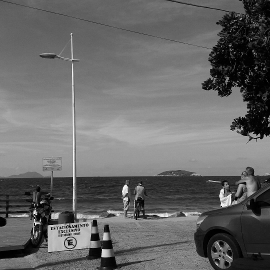

In [5]:
def luminosity(img):
    
    img_mono = np.asarray(img)
    
    for i, line in enumerate(img_mono):
        for j, pixel in enumerate(line):
            pixel_mono = 0.299 * pixel[0] + 0.587 * pixel[1] + 0.144 * pixel[2]
            img_mono[i][j] = pixel_mono
            
    img_mono = Image.fromarray(img_mono)
    
    return img_mono

image_mono = luminosity(image)
#image_mono.show()
image_mono

### 2.2. Reconstruindo uma imagem colorida RGB

Na pasta <code>canaisRGB</code> encontram-se três imagens em tons de cinza, representando os dados dos três canais (R, G e B) de uma imagem colorida. Esta tarefa consiste em você reconstruir a imagem original, da qual foram extraídos tais canais.

Tendo em vista os passos que você executou nos itens anteriores, use as informações que extrair de cada imagem monocromática para criar uma nova imagem, colorida, conforme abaixo:

<img src='pimentas.png' width='20%'>

<u>Obs</u>.: na classe <code>Image</code>, uma imagem pode tanto ser salva com um parâmetro adicional chamado <code>mode</code>, que determina o modo como a imagem deve ser salva. Os principais valores para este parâmetro são:

<ul>
    <li>'RGB': imagem colorida RGB</li>
    <li>'L': imagem monocromática em tons de cinza</li>
    <li>'1': imagem binária</li>
</ul>

Para mais valores deste parâmetro, consulte <a href='https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes' target='_blank'>este link</a>.

<u>Dica</u>: a classe <code>Image</code> possui um método chamado <code>convert</code>, que permite que se converta uma imagem (um objeto da classe <code>Image</code>) do seu modo original para outro. Por exemplo (considere a imagem no objeto <code>img</code>):

<code>img2 = img.convert(mode='L)</code>

Para saber mais, consulte <a href='https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert'>este link</a>.

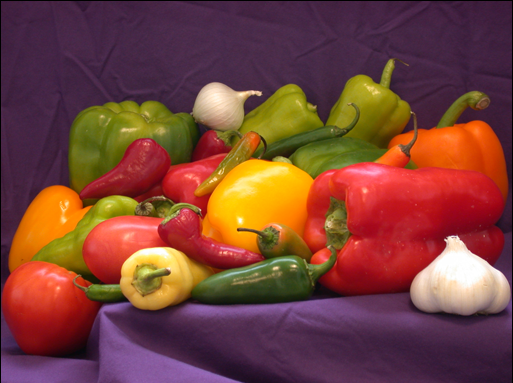

In [6]:
def reconstruct(img_r, img_g, img_b):
    
    img_r_np = np.asarray(img_r)
    img_g_np = np.asarray(img_g)
    img_b_np = np.asarray(img_b)
    
    img_rect = np.empty((img_r_np.shape[0], img_r_np.shape[1], 3))
    
    for i, line in enumerate(img_rect):
        for j, pixel in enumerate(line):
            img_rect[i][j][0] = img_r_np[i][j]
            img_rect[i][j][1] = img_g_np[i][j]
            img_rect[i][j][2] = img_b_np[i][j]
            
            
    img_rect = Image.fromarray(np.uint8(img_rect))
    return img_rect

image_r = Image.open("canaisRGB\\pimentas-r.png")
image_g = Image.open("canaisRGB\\pimentas-g.png")
image_b = Image.open("canaisRGB\\pimentas-b.png")

image_rect = reconstruct(image_r, image_g, image_b)
#image_rect.show()
image_rect

### 2.3 Brilho e contraste

A imagem <code>pimentas-ruim.png</code> (ver visualização abaixo) é uma versão deteriorada da imagem que você reconstruiu no item anterior. Ela foi obtida alterando-se o brilho e o contraste da imagem original.

<img src='pimentas-ruim.png' width='20%'>

Neste exercício, você deve tentar restaurar, de forma aproximada, a imagem original. Para isto, vamos utilizar a função <code>rmse</code>, apresentada acima. Complete o código abaixo para cumprir esta tarefa.

In [ ]:
def normalize_pixel(pixel):
    for i, channel in enumerate(pixel):
        if channel < 0:
            pixel[i] = 0
        elif channel > 255:
            pixel[i] = 255
    return pixel

### Abrir e extrair dados da imagem deteriorada (completar abaixo)

image_deteriorada = Image.open("pimentas-ruim.png")

### Abrir e extrair dados da imagem a ser reconstruída/original (completar abaixo)

image_original = Image.open("pimentas.png")

### Incializações dos melhores valores (completar abaixo)

melhor_imagem = image_deteriorada

melhor_rmse = -1
melhor_c = -1
melhor_b = -1

for i in range(1,20):
    c = i / 10
    
    for j in range(200):
        b = i - 100
        
        image_sample = np.asarray(image_deteriorada)
        
        for l, line in enumerate(image_sample):
            for c, pixel in enumerate(line):
                pixel = normalize_pixel(pixel * c + b)
                
                image_sample[l][c] = pixel
                
        image_sample = Image.fromarray(image_sample) 
        
        sample_rmse = rmse(image_original, image_sample)
        
        if melhor_rmse == -1 or sample_rmse < melhor_rmse:
            melhor_imagem = image_sample
            melhor_rmse = sample_rmse
            melhor_c = c
            melhor_b = b
            
### Para valores de c entre 0.1 e 2.0 e valores de b entre -100 e 100 faça:
###    reconstrua uma imagem a partir da combinação de parâmetros acima e compare (rmse) com a original
###    salve o melhor resultado obtido (se encontrado naquela iteração)
###   Implemente abaixo:

### Exibição dos resultados
print('\nMelhor resultado: brilho = %d e contraste = %5.5f (RMSE=%5.5f)' % (melhor_b, melhor_c, melhor_rmse))

### Exiba a melhor imagem (não é necessário salvar)
 